In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")
boston=load_boston()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor
from prettytable import PrettyTable    

In [13]:
x=load_boston().data
y=load_boston().target
df=pd.DataFrame(x)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=4)
std=preprocessing.StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

xtr_df=pd.DataFrame(x_train)
xtr_df['price']=y_train
xtr_df.shape
xtr_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.425469,-0.470768,-0.954686,-0.231455,-0.919581,0.215100,-0.747410,0.454022,-0.764468,-0.976012,0.005460,0.441889,-0.444819,23.9
1,-0.426323,2.992576,-1.330157,-0.231455,-1.227311,-0.883652,-1.691588,3.163428,-0.651568,-0.464548,1.616046,0.287498,-0.666438,18.2
2,-0.385190,-0.470768,-0.705828,4.320494,-0.423795,-0.125423,0.818985,-0.353904,-0.199967,-0.623278,-0.500725,0.423713,1.226505,21.7
3,-0.249268,-0.470768,-0.423497,-0.231455,-0.158805,-0.228336,1.021567,-0.021755,-0.651568,-0.623278,1.155878,-1.185126,1.068407,13.5
4,-0.365945,0.395068,-1.030363,-0.231455,0.157472,3.102729,-0.060078,-0.646202,-0.538668,-0.876071,-2.525462,0.306551,-0.752545,50.0


In [28]:
#SGD self implementation
W,B,iteration,lr_rate,k=np.zeros(shape=(1,13)),0,1000,0.01,25 #intialise vector W to zero ,scalar B to zero , iteration=1000 , learning rate=0.01,k=batchsize=25

for itr in tqdm(range(iteration)):
    w,b,tem_vec,tem_incpt=W,B,np.zeros(shape=(1,13)),0
    new_data=xtr_df.sample(25) #sampling random k=batch_size=25 data
    x=np.array(new_data.drop('price',axis=1)) #x stores sampled data
    y=np.array(new_data['price']) #y stores sampled data
    
    for i in range(k): # for eacch itr :i runs for 25 times
        tem_vec=tem_vec+(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b)) #differentiated eqn
        tem_incpt=tem_incpt+(-2)*(y[i]-(np.dot(w,x[i])+b))  
    W=(w-lr_rate*(tem_vec)/k)   #Calculating weight
    B=(b-lr_rate*(tem_incpt)/k) 
print(W)
print(B)
#https://numpy.org/doc/stable/reference/generated/numpy.dot.html


[[-1.050332    1.11214712 -0.15314985  1.22872066 -1.60212414  1.99599582
  -0.01165838 -3.20705273  2.41806794 -1.4724067  -1.6783505   0.73152697
  -3.74621601]]
[22.11069232]


In [17]:
y_hat=[]
for i in range(len(x_test)):
    pred_val=np.dot(W,x_test[i])+B
    y_hat.append(np.asscalar(pred_val))
#https://www.geeksforgeeks.org/numpy-asscalar-in-python

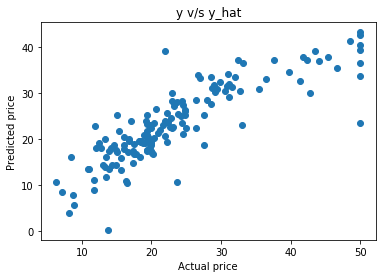

In [18]:
plt.scatter(y_test,y_hat)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("y v/s y_hat")
plt.show()

In [19]:
mse=mean_squared_error(y_test,y_hat)
mae=mean_absolute_error(y_test,y_hat)
print("MSE",mse)
print("MAE",mae)

MSE 28.65801524816916
MAE 3.7283840916214435


## Implementing SGD using sklearn

In [20]:
#Sklearn SGD implemention, using previously used train and test data 
sgd = SGDRegressor()
sgd.fit(x_train, y_train)

SGDRegressor()

In [21]:
y_hat_sgd=sgd.predict(x_test)

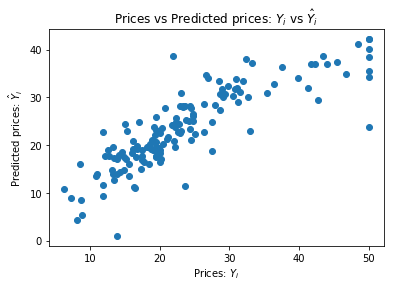

In [22]:
plt.scatter(y_test,y_hat_sgd)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [23]:
mse=mean_squared_error(y_test,y_hat_sgd)
mae=mean_absolute_error(y_test,y_hat_sgd)
print("MSE",mse)
print("MAE",mae)

MSE 29.67038102430654
MAE 3.8144001829398215


In [39]:
sklearn_sgd_weight=sgd.coef_

## Conclusion

In [52]:
#Table showing weights
x = PrettyTable()
column_names = ['Self SGD_weight','Sklearn SGD_weight']
x.add_column(column_names[0],W[0])
x.add_column(column_names[1],sklearn_sgd_weight)  
print(x)

+----------------------+----------------------+
|   Self SGD_weight    |  Sklearn SGD_weight  |
+----------------------+----------------------+
| -0.8643778323074938  | -1.0271535187514829  |
|  1.1121891228927454  |  1.1519585734764535  |
| -0.41170904540119496 | -0.39549543773182705 |
|  0.9205482351334228  |  1.0841315811744174  |
| -1.4766658720815533  |  -1.581813998706039  |
|  2.1491262329910668  |  2.2706767046163994  |
| -0.22466228228844884 | -0.15760285204111085 |
|  -3.179122673966019  | -3.1817416584700062  |
|  1.9064389677492497  |  2.0353124571773886  |
|  -1.401666361585271  | -1.5351530375854299  |
| -1.5979972483299938  |  -1.751320327297852  |
|  0.9587038141558701  |  0.849678498833273   |
|  -3.56575966492354   |  -3.730305610421711  |
+----------------------+----------------------+


In [3]:
#Table showing errors
x= PrettyTable()
x.field_names=['Model','Error Type','Error']
x.add_row(['Self SGD','MSE',29.676320412098082])
x.add_row(['Self SGD','MAE',3.779891666092997])
x.add_row(['Sklearn SGD','MSE',29.935375112161434])
x.add_row(['Sklearn SGD','MAE',3.7999981134575314])
print(x)

+-------------+------------+--------------------+
|    Model    | Error Type |       Error        |
+-------------+------------+--------------------+
|   Self SGD  |    MSE     | 29.676320412098082 |
|   Self SGD  |    MAE     | 3.779891666092997  |
| Sklearn SGD |    MSE     | 29.935375112161434 |
| Sklearn SGD |    MAE     | 3.7999981134575314 |
+-------------+------------+--------------------+


### Considering the above tables we can say that "Self SGD" and "Sklearn SGD" are giving almost same results and doing its best 